## Example 1: Calculating the temperature distribution of a metal plate

### Theory

Suppose we have a two-dimensional rectangular plate that is subjected to certain boundary conditions- one side is kept at 100 degrees Celsius and the rest of the sides are kept at 0. Our target is to calculate the temperature distribution at each point. 

The way we will do that is to divide the plate in a lattice, and calculate the temperature at each point, using the Laplace equation and making use of the finite difference method and the Harrow-Hassidim-Lloyd (HHL) algorithm.

The <b>Laplace equation </b> for a steady bidimensional system is:
$$\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0 $$

We can use the finite difference method to derive another form of this equation for the nodal point $(i, j)$ on the lattice. 
$$\frac{\partial^2 T}{\partial x^2} \Biggr|_{(i, j)} = \frac{1}{\Delta x} \frac{(T_{i+1, j} - T_{i, j})-(T_{i, j} - T_{i-1, j})}{\Delta x}= \frac{T_{i+1, j} -2 T_{i, j} + T_{i-1, j}}{\Delta x^2}$$

And one can obtain an analogous expression for $y$. Next, we are going to define the lattice constant, $h = \Delta x = \Delta y$. Putting everything together, we obtain:

$$\frac{T_{i+1, j} -2 T_{i, j} + T_{i-1, j}}{h^2} + \frac{T_{i, j+1} -2 T_{i, j} + T_{i, j-1}}{h^2} = 0$$

$$ 4T_{i, j} - T_{i-1, j} - T_{i, j-1} - T_{i+1, j} - T_{i, j+1} = 0 $$

From the symmetry of the particular abovementioned system, we can exploit the symmetry to reduce the number of unknowns to only eight (the points in the middle and one of the sides).

]We end up with the following system of equations:
    $$ 4T_{1,1} - 0 -T_{1,2} - T_{2,1} - 100 = 0 $$
    $$ 3T_{2,1} - T_{1,1} - T_{2,2} - T_{1,1} - 100 = 0 $$
    $$ 4T_{1,2} - 0 - T_{1,3} - T_{2,2} - T_{1,1} = 0 $$
    $$ 3T_{2,2} - T_{2,3} - T_{1,2} - T_{2,1} = 0 $$
    $$ 4T_{1,3} - 0 - T_{1,4} - T_{2,3} - T_{1,2} = 0 $$
    $$ 3T_{2,3} - T_{1,3} - T_{2,4} - T_{2,2} = 0 $$
    $$ 4T_{1,4} - 0 - 0 - T_{1,3} - T_{2,4} = 0 $$
    $$ 4T_{1,4} - 0 - 0 - T_{1,3} - T_{2,4} = 0 $$

Which can be written in matrix form:
$$\begin{pmatrix}
4 & -1 & -1 & 0 & 0 & 0 & 0 & 0\\
-1 & 3 & 0 & -1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 4 & -1 & -1 & 0 & 0 & 0 \\
0 & -1 & -1 & 3 & 0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 & 4 & -1 & -1 & 0 \\
0 & 0 & 0 & -1 & -1 & 3 & 0 & -1 \\
0 & 0 & 0 & 0 & -1 & 0 & 4 & -1 \\
0 & 0 & 0 & 0 & 0 & -1 & -1 & 3 \\
\end{pmatrix}
\begin{pmatrix}
T_{1,1} \\
T_{2,1} \\
T_{1,2} \\
T_{2,2} \\
T_{1,3} \\
T_{2,3} \\
T_{1,4} \\
T_{2,4}
\end{pmatrix}
=
\begin{pmatrix}
100 \\
100 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{pmatrix}
$$

### The HHL Algorithm

Now, we are ready to apply the HHL algorithm. What this algorithm does is, given a matrix $A$ and a vector $\vec{b}$, it finds a vector $\vec{x}$, such as $A\vec{x}=\vec{b}$. The matrix must be Hermitian so that it can be converted to an unitary operator. However, the algorithm can work with a non-Hermitian matrix too, by constructing an auxiliary matrix that satisfies this condition, like this:
$$ C =
\begin{pmatrix}
0  & A \\
A^\dag & 0
\end{pmatrix}
$$


Another condition that has to be imposed is that the matrix has a number of $N=2^n$ rows/columns. That is because we need a number of $n$ qubits to represent $N$ numbers. This can be engineered by choosing the lattice points accordingly.

The advantage of the algorithm is its speedup. A system of linear equations is called  $s$-sparse if it has at most $s$ non-zero entries per row or column. Solving an $s$-sparse system of size $N$ with a classical computer requires $\mathcal{O}(Nsk\log{1/\epsilon})$ running time using the conjugate gradient method, where $k$ denotes the condition number of the system and $\epsilon$ is the accuracy of the approximation. The HHL algorithm requires running time complexity $\mathcal{O}(s^2k^2/\epsilon\log{N})$.

In [27]:
# importing libraries
import qiskit
import numpy as np
from linear_solvers import NumPyLinearSolver, HHL

#constructing the matrix A and the vector b
matrix = np.array([[4, -1, -1, 0, 0, 0, 0, 0], [-1, 3, 0, -1, 0, 0, 0, 0], [-1, 0, 4, -1, -1, 0, 0, 0], [0, -1, -1, 3, 0, -1, 0, 0], [0, 0, -1, 0, 4, -1, -1, 0], [0, 0, 0, -1, -1, 3, 0, -1], [0, 0, 0, 0, -1, 0, 4, -1], [0, 0, 0, 0, 0, -1, -1, 3]])
vector = np.array([100, 100, 0, 0, 0, 0, 0, 0])

#defining the HHL solution and the classical solution (used for reference purposes)
naive_hhl_solution = HHL().solve(matrix, vector)
classical_solution = NumPyLinearSolver().solve(matrix,
                                               vector/np.linalg.norm(vector))

In [28]:
#calculating the solution using classical methods
print('classical state:', classical_solution.state)

classical state: [0.32141217 0.42051426 0.15802765 0.23302383 0.07767461 0.12052956
 0.03214122 0.05089026]


We notice that if we plug these numbers back in, we get the matrix:
    $$   \begin{pmatrix}
0.70710677\\
0.70710677 \\
-0.00000001 \\
0.00000002\\
0.00000001\\
-0.00000002 \\
0.00000001 \\
0
\end{pmatrix}
$$

Therefore we rescale the classical solution:

In [33]:
 classical_solution.state = classical_solution.state*100/0.70710677

In [34]:
print('classical state:', classical_solution.state)

classical state: [45.45454617 59.46969791 22.3484852  32.95454598 10.98484866 17.04545482
  4.54545462  7.19696981]


print('naive state:')
print(naive_hhl_solution.state)

In [35]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)

classical Euclidean norm: 0.6193500362487158
naive Euclidean norm: 0.6254241275267816


In [54]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data

# Extract vector components
naive_full_vector = np.array([naive_sv[0], naive_sv[1], naive_sv[2], naive_sv[3], naive_sv[4], naive_sv[5], naive_sv[6], naive_sv[7]])

print('naive raw solution vector:', naive_full_vector)

naive raw solution vector: [ 0.59637106+5.96566738e-14j  0.53617984+1.04241214e-13j
 -0.12709113-2.19903155e-14j -0.20205161-3.53421913e-14j
 -0.09608339-2.00372154e-14j -0.15492271-2.35554972e-14j
 -0.0462307 -3.16586557e-15j -0.07541418-6.21609726e-16j]


In [62]:
def get_solution_vector(solution):
    """Extracts and normalizes simulated state vector
    from LinearSolverResult."""
    solution_vector = Statevector(solution.state).data[0:8].real
    norm =  classical_solution.euclidean_norm
    return norm * solution_vector / naive_hhl_solution.euclidean_norm

print('full naive solution vector:', get_solution_vector(naive_hhl_solution))
print('classical state:', classical_solution.state)

full naive solution vector: [ 0.59057913  0.53097249 -0.12585682 -0.2000893  -0.09515023 -0.15341811
 -0.04578171 -0.07468176]
classical state: [0.32141217 0.42051426 0.15802765 0.23302383 0.07767461 0.12052956
 0.03214122 0.05089026]


after rescaling, we obtain:

In [38]:
print('full naive solution vector:', get_solution_vector(naive_hhl_solution)*100/1.25)

full naive solution vector: [ 47.24633073  42.47779903 -10.06854587 -16.00714378  -7.6120183
 -12.27344872  -3.66253683  -5.97454096]


Text(0, 0.5, 'value of temperature')

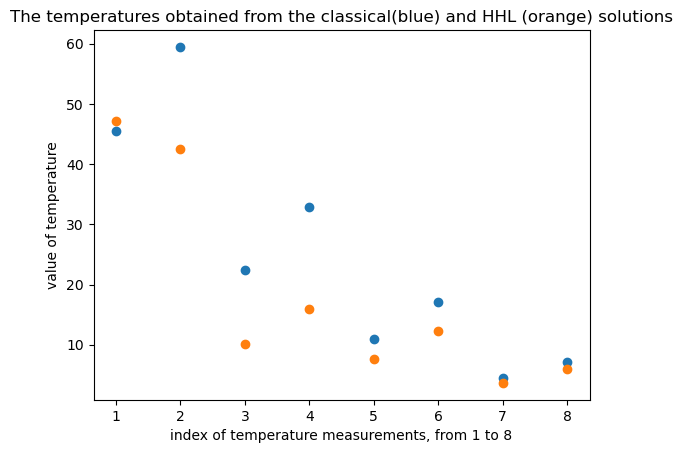

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x1  = [1, 2, 3, 4, 5, 6, 7, 8]
y1 = [45.45454617, 59.46969791, 22.3484852, 32.95454598, 10.98484866, 17.04545482, 4.54545462, 7.19696981]

x2  = [1, 2, 3, 4, 5, 6, 7, 8]
y2 =  [47.24633073, 42.47779903, 10.06854587, 16.00714378, 7.6120183, 12.27344872, 3.66253683, 5.97454096]

plt.scatter(x1, y1)

plt.scatter(x2, y2)

plt.title('The temperatures obtained from the classical(blue) and HHL (orange) solutions')
plt.xlabel('index of temperature measurements, from 1 to 8')
plt.ylabel('value of temperature')

## Example 2: 2D Poiseuille flow

The next example we are going to explore is 2D Poiseuille flow. Consider two parallel plates between two fluid flows parallel to them. Our target is to calculate the velocity distribution with respect to the distance between the two plates.

The equation of motion the fluid will obey is given by:

$$\mu \frac{\partial^2 u}{\partial x^2} = -\frac{p_1-p_2}{L}$$

Again, we will use the finite difference method. Incorporating the above constants in the constant $c$:

$$u_{i+1}-2u_{i}+u_{i-1} = c$$ 

from where one can obtain the matrix:

$$\begin{pmatrix}
-2 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
1 & -2 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & -2 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & -2 \\
\end{pmatrix}
\begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \\
u_6 \\
u_7 \\
u_8
\end{pmatrix}
=
\begin{pmatrix}
c \\
c \\
c \\
c \\
c \\
c \\
c \\
c
\end{pmatrix}
$$

With the same approach as before:

In [ ]:
#constructing the matrix A and the vector b
matrix = np.array([[-2, 1, 0, 0, 0, 0, 0, 0], [1, -2, 1, 0, 0, 0, 0, 0], [0, 1, -2, 1, 0, 0, 0, 0], [0, 0, 1, -2, 1, 0, 0, 0], [0, 0, 0, 1, -2, 1, 0, 0], [0, 0, 0, 0, 1, -2, 1, 0], [0, 0, 0, 0, 0, 1, -2, 1], [0, 0, 0, 0, 0, 0, 1, -2]])
vector = np.array([-100, -100, -100, -100, -100, -100, -100, -100])

#defining the HHL solution and the classical solution (used for reference purposes)
naive_hhl_solution = HHL().solve(matrix, vector)
classical_solution = NumPyLinearSolver().solve(matrix,
                                               vector/np.linalg.norm(vector))

In [42]:
#calculating the solution using classical methods
print('classical state:', classical_solution.state)

classical state: [1.41421356 2.47487373 3.18198052 3.53553391 3.53553391 3.18198052
 2.47487373 1.41421356]


After rescaling:

In [43]:
print('classical state:', classical_solution.state*100/0.3535)

classical state: [ 400.06041368  700.10572395  900.13593079 1000.15103421 1000.15103421
  900.13593079  700.10572395  400.06041368]


The ``linear solvers`` package contains a folder called ``matrices`` intended to be a placeholder for efficient implementations of particular types of matrices. The matrix we are working with now is tridiagonal, and therefore we will use the ``TridiagonalToeplitz`` class. The complexity of the algorithm scales polynomially in the number of qubits.

In [59]:
from linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(3, -2, 1)
tridi_solution = HHL().solve(tridi_matrix, vector)

In [60]:
print('tridiagonal state:')
print(tridi_solution.state)

tridiagonal state:
          ┌─────────────────┐┌───────┐        ┌──────────┐
q25526_0: ┤0                ├┤7      ├────────┤7         ├
          │                 ││       │        │          │
q25526_1: ┤1 circuit-266735 ├┤8      ├────────┤8         ├
          │                 ││       │        │          │
q25526_2: ┤2                ├┤9      ├────────┤9         ├
          └─────────────────┘│       │┌──────┐│          │
q25527_0: ───────────────────┤0      ├┤6     ├┤0         ├
                             │       ││      ││          │
q25527_1: ───────────────────┤1      ├┤5     ├┤1         ├
                             │       ││      ││          │
q25527_2: ───────────────────┤2      ├┤4     ├┤2         ├
                             │   QPE ││      ││   QPE_dg │
q25527_3: ───────────────────┤3      ├┤3     ├┤3         ├
                             │       ││      ││          │
q25527_4: ───────────────────┤4      ├┤2     ├┤4         ├
                             │       

In [61]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)

classical Euclidean norm: 7.842193570679061
tridiagonal Euclidean norm: 7.691927176871837


In [62]:
tridi_sv = Statevector(tridi_solution.state).data

# Extract vector components
tridi_full_vector = np.array([tridi_sv[0], tridi_sv[1], tridi_sv[2],  tridi_sv[3],  tridi_sv[4],  tridi_sv[5],  tridi_sv[6],  tridi_sv[7]])

print('tridi raw solution vector:', tridi_full_vector)

tridi raw solution vector: [-0.20274395+1.55121707e-05j -0.07130033+5.60451222e-04j
  0.02375542-2.64519041e-04j  0.07417265-3.11444352e-04j
  0.07417265-3.11444352e-04j  0.02375542-2.64519041e-04j
 -0.07130033+5.60451222e-04j -0.20274395+1.55121707e-05j]


In [63]:
print('full tridi solution vector:', get_solution_vector(tridi_solution))

full tridi solution vector: [-0.20273932 -0.07129871  0.02375488  0.07417096  0.07417096  0.02375488
 -0.07129871 -0.20273932]


after rescaling:

In [66]:
   print('full tridi solution vector:', get_solution_vector(tridi_solution)*100/0.045 +850)

full tridi solution vector: [ 399.46817215  691.55842865  902.788617   1014.8243467  1014.8243467
  902.788617    691.55842865  399.46817215]


Text(0, 0.5, 'value of velocity')

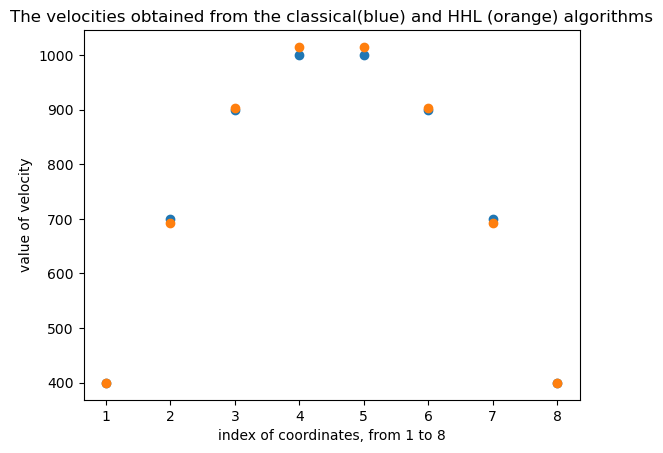

In [70]:
import matplotlib.pyplot as plt
import numpy as np

x1  = [1, 2, 3, 4, 5, 6, 7, 8]
y1 = [400.06041368, 700.10572395, 900.13593079, 1000.15103421, 1000.15103421, 900.13593079, 700.10572395, 400.06041368]

x2  = [1, 2, 3, 4, 5, 6, 7, 8]
y2 = [399.46817215, 691.55842865, 902.788617 ,  1014.8243467,  1014.8243467, 902.788617, 691.55842865, 399.46817215]

plt.scatter(x1, y1)

plt.scatter(x2, y2)

plt.title('The velocities obtained from the classical(blue) and HHL (orange) algorithms')
plt.xlabel('index of coordinates, from 1 to 8')
plt.ylabel('value of velocity')

Therefore, we can see that the velocity profile is parabolic.

## First conclusion

As a first conclusion, we noticed that the HHL algorithm provides physically acceptable solutions even before further processing, so that would be enough if our target is to find out the shape of the function a certain physical quantity obeys. If we want correct numerical values, rescaling is required. However, this process can be done through elementary operations.